In [3]:
%matplotlib inline
import math as m; import numpy as np; import matplotlib.pyplot as plt; import matplotlib.colors
import pandas as pd; import os; import pathlib; import string; import datetime

directory = 'D:\\Jupiter_satellites_data\\'

In [4]:
# moon data
sat_list = ['IO', 'EUROPA', 'GANYMEDE']
sat_list_ind = [0, 1, 2]
MS_sat = np.array([6.0, 9.7, 15.8])

RG = 0.0377 # Ganymede radius in RJ
RE = 0.0223 # Europa radius in RJ
RI = 0.0261 # Io radius in RJ

R_list = np.array([RI, RE, RG])
R_labels = np.array(['RI', 'RE', 'RG'])

In [5]:
np.append(np.array([1]), np.array([0]*5))

array([1, 0, 0, 0, 0, 0])

In [6]:
moon_ind = np.array([]); MLAT_list = np.array([]); MLT_list = np.array([]);
MSHELL_list = np.array([]); D_EQ_list = np.array([]); MLT_DIFF_list = np.array([]);
M_DIFF_list = np.array([]); Bw_RMS_list = np.array([]); EFLUX_MAG_list = np.array([]);


for i in np.arange(len(sat_list)):
    moon = sat_list[i]
    file = f'{moon}_ConjunctionEventsData.csv'
    fields = ['Date', 'MLAT', 'MLT', 'MSHELL', 'D_EQ', 'MLT_DIFF', 'M_DIFF', 'Bw_RMS', 'EFLUX_MAG']
    data = pd.read_csv(directory + file, names = fields, usecols = fields, sep=',', header = 0)
    print(len(data['Bw_RMS'].values))
    
    moon_ind = np.append(moon_ind, np.array([i]*len(data['MLAT'].values)))
    MLAT_list = np.append(MLAT_list, data['MLAT'].values)
    MLT_list = np.append(MLT_list, data['MLT'].values)
    MSHELL_list = np.append(MSHELL_list, data['MSHELL'].values)
    D_EQ_list = np.append(D_EQ_list, data['D_EQ'].values)
    MLT_DIFF_list = np.append(MLT_DIFF_list, data['MLT_DIFF'].values)
    M_DIFF_list = np.append(M_DIFF_list, data['M_DIFF'].values)
    Bw_RMS_list = np.append(Bw_RMS_list, data['Bw_RMS'].values)
    EFLUX_MAG_list = np.append(EFLUX_MAG_list, data['EFLUX_MAG'].values)

10
18
10


In [7]:
print(moon_ind)
print(MLAT_list)
print(MSHELL_list)
print(D_EQ_list)
print(Bw_RMS_list)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[-57.25    63.28   -57.79   -54.79    51.84    30.69    67.93    64.57
  56.17    63.21   -62.34    58.84    68.37    67.48     9.37    31.29
  69.83   -59.48     5.758   54.97    69.26   -58.14    71.69    69.42
   1.888   15.36   -57.68     4.934   30.86    42.16   -64.16     3.429
  65.84     9.699  -62.76    -2.513    0.7776  72.51  ]
[ 6.079  5.957  5.749  5.888  6.081  6.019  5.706  5.9    5.531  5.845
  9.875 10.05   9.77   9.099 10.36   9.513  9.333  9.829  9.583  9.547
 10.16   9.284  8.465 10.65   9.516  9.797 10.04   9.468 15.19  16.49
 17.13  14.88  15.81  14.48  14.85  15.02  15.65  16.84 ]
[ 36.45   26.01   57.48   27.13    8.54   51.2    27.93   45.66   19.63
  39.05  108.6     7.795  75.14   34.56   24.86   31.25   67.64   42.52
  32.62   70.61   93.53   63.15   65.51  102.1    50.25   23.    115.6
   1.112  10.55   85.72   68.17   10.04  102.6   103.7   

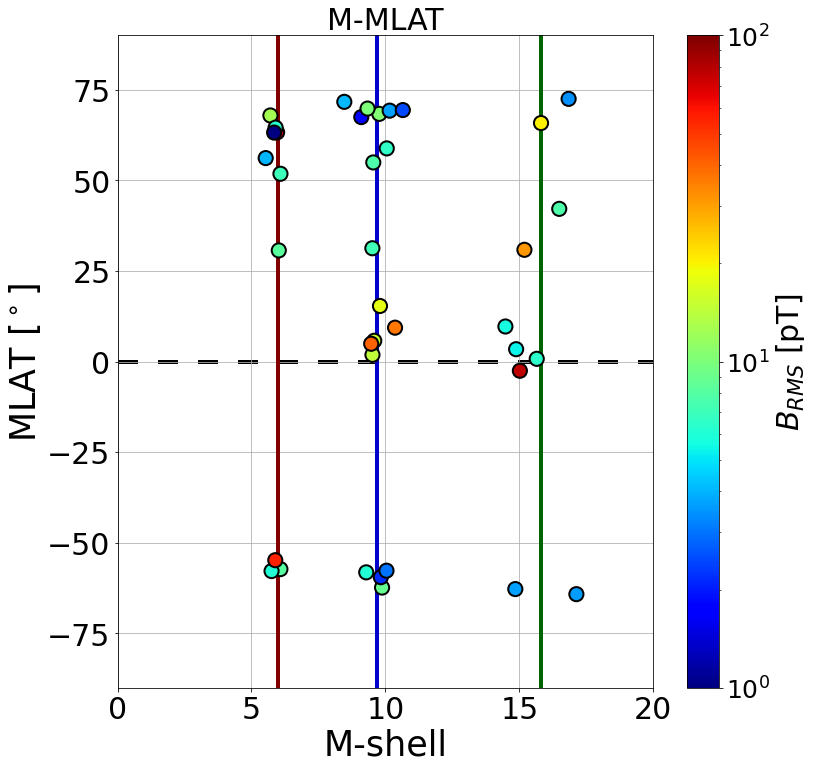

In [14]:
lat_range = np.linspace(-90,90,10000)

plt.figure(figsize = (12,12))
plt.title('M-MLAT', fontsize=35)
plt.scatter(MSHELL_list, MLAT_list, c=Bw_RMS_list, edgecolors='k', linewidth=2, cmap='jet',s=200, \
            norm=matplotlib.colors.LogNorm(), zorder=4)
cbar = plt.colorbar()
plt.clim(1e0, 1e2) 
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('$B_{RMS}$ [pT]',fontsize=30)
cbar.ax.set_yticklabels(['$10^{0}$', '$10^{1}$', '$10^{2}$'])

line_colors = ['maroon','mediumblue','darkgreen']
for i in np.arange(len(MS_sat)):
    plt.axvline(MS_sat[i],color=line_colors[i], zorder=2, linewidth=4)
plt.axhline(c='k',linestyle=(0, (5, 5)), zorder=1, linewidth=4)

#rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)

plt.xlabel('M-shell', fontsize = 35)
plt.ylabel('MLAT [$^\circ$]', fontsize = 35)
plt.xlim(0,20)
plt.ylim(-90,90)
plt.xticks([0,5,10,15,20],fontsize = 30)
plt.yticks([-75, -50, -25, 0 , 25, 50, 75],fontsize = 30)
plt.grid(True)
#plt.legend()

# j=0
# for i in np.arange(len(t_str)):
#     if i in indices:
#         if names[j][0] == 'I':
#             offset = 0.45
#         elif names[j] == 'E1':
#             offset = 0
#         elif names[j] == 'E2':
#             offset = 1.2
#         else:
#             offset = 0.6
#         plt.annotate(f'{names[j]}', (MS_list[i]-offset, MLAT_list[i]+4),size=30, zorder=5)
#         j+=1

plt.show()

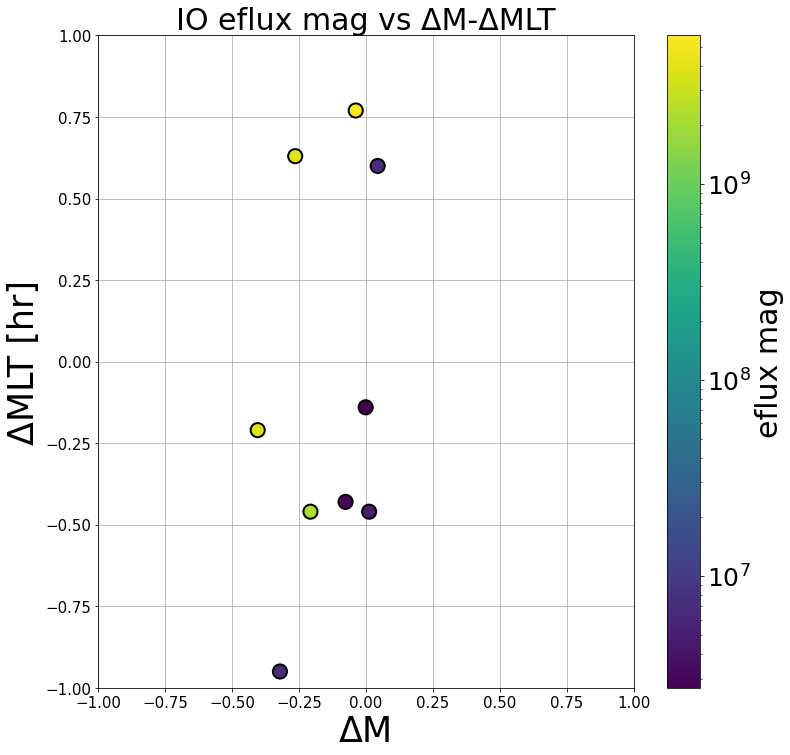

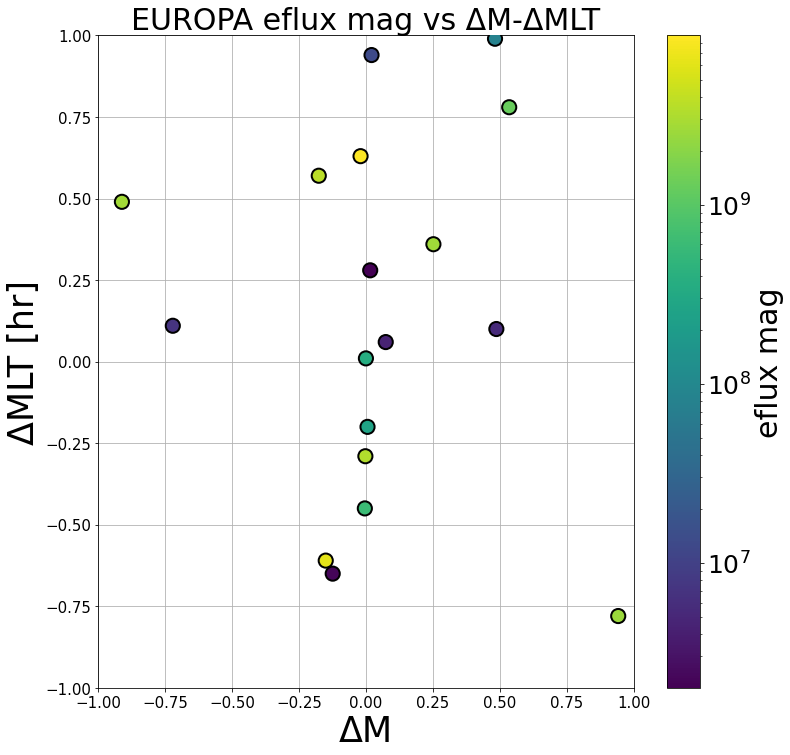

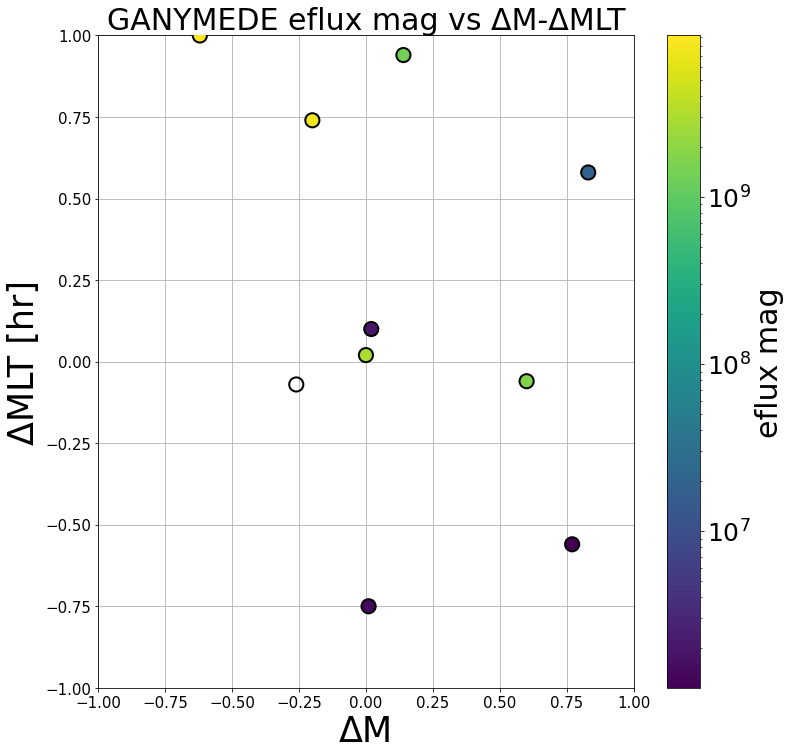

In [18]:
for i in np.arange(len(sat_list)):
    plt.figure(figsize = (12,12))
    plt.title(f'{sat_list[i]} eflux mag vs \u0394M-\u0394MLT', fontsize=30)
    plt.scatter(M_DIFF_list[moon_ind == sat_list_ind[i]], MLT_DIFF_list[moon_ind == sat_list_ind[i]], \
                c=EFLUX_MAG_list[moon_ind == sat_list_ind[i]], edgecolors='k', linewidth=2, cmap='viridis',s=200, \
                norm=matplotlib.colors.LogNorm(), zorder=4)
    cbar = plt.colorbar()
    # plt.clim(1e0, 1e2) 
    cbar.ax.tick_params(labelsize=25)
    cbar.ax.set_ylabel('eflux mag',fontsize=30)
    # cbar.ax.set_yticklabels(['$10^{0}$', '$10^{1}$', '$10^{2}$'])

    plt.xlabel('\u0394M', fontsize = 35)
    plt.ylabel('\u0394MLT [hr]', fontsize = 35)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.grid(True)

    plt.show()